A stock is trading at $147, and options are trading at the following prices.  Assume the options all have the same maturity and bid = ask = price.

| Strike | Call | Put |
| --- | --- | --- |
|120|	31.55	|1.96|
|125	|27.10	|2.76|
|130	|24.40	|3.57|
|135	|18.10	|4.75|
|140	|14.93	|6.25|
|145	|11.60	|8.25|
|150	|8.89	|10.42|
|155	|6.50	|13.25|
|160	|4.70	|16.60|
|165	|3.25	|20.25|


*1.  Suppose you own the stock and want to collar it.  Propose a costless (or, rather, near costless) collar. Plot the value of your collared stock, net of any income/expense for the collar, as a function of the stock price at the options maturity.*

An example would be to buy a 140 put and sell a 160 call.  The net cost would be 4.75-4.70 - 0.05.  The value of the portfolio would range between 139.95 and 159.95 as shown below.

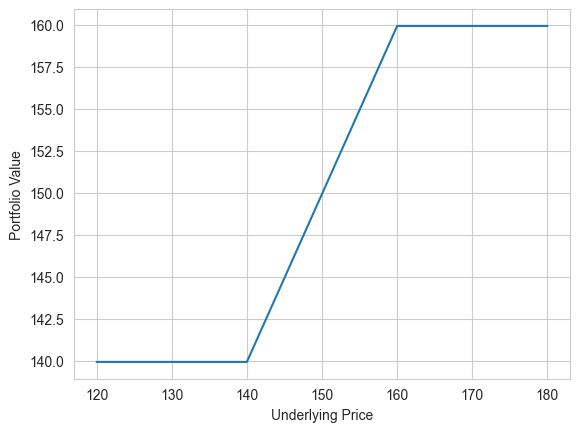

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

stock_value = np.arange(120, 181)
put_value = np.maximum(140 - stock_value, 0)
call_value = np.maximum(stock_value - 160, 0)
portfolio_value = stock_value + put_value - call_value - 0.05

plt.plot(stock_value, portfolio_value)
plt.xlabel("Underlying Price")
plt.ylabel("Portfolio Value")
plt.show()

*2. Suppose you don't own the stock but want to make a bet on it.  Propose a bull spread.  Plot your profit or loss on the spread as a function of the stock price if you hold it to maturity.  The profit or loss should be as a percent of the cost of the spread.*

An example would be to buy a 145 call and sell a 155 call.  The difference in prices is 11.60 - 6.50 = 5.10.  This is the cost of the spread to you.  If the stock finishes below 145, you lose 100%.  If the stock finishes above 155, you make a profit of 155 - 145 - 5.10 = 4.90, which is a return of 4.90/5.10, which is 96%.  From 145 and 155, your return moves linearly from -100% to +96%. 

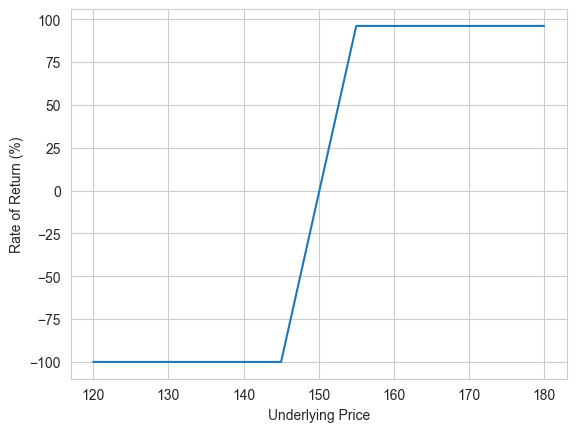

In [8]:
call1_value = np.maximum(stock_value - 145, 0)
call2_value = np.maximum(stock_value - 155, 0)
ret = 100 * (call1_value - call2_value - 5.10) / 5.10

plt.plot(stock_value, ret)
plt.xlabel("Underlying Price")
plt.ylabel("Rate of Return (%)")
plt.show()

*3. Assume you want to bet against the stock and repeat #2 for a bear spread.*

An example would be to buy a 140 put and sell a 130 put.  The difference in prices is 6.25 - 3.27 = 2.98.  This is the cost of the spread to you.  If the stock finishes above 140, you will lose 100%.  If the stock finishes below 130, you will make a return of (140 - 130 - 2.98)/2.98, which is 236%.

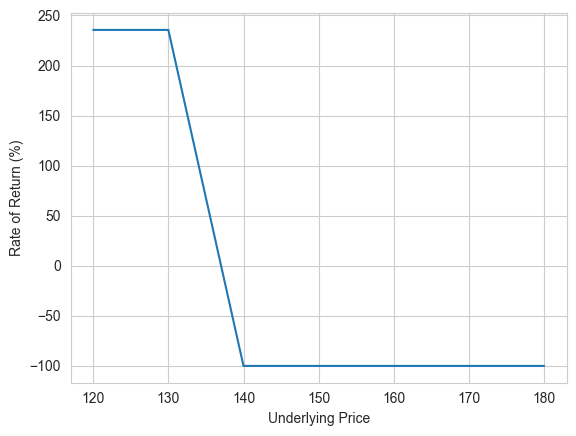

In [11]:
put1_value = np.maximum(140 - stock_value, 0)
put2_value = np.maximum(130 - stock_value, 0)
ret = 100 * (put1_value - put2_value - 2.98) / 2.98

plt.plot(stock_value, ret)
plt.xlabel("Underlying Price")
plt.ylabel("Rate of Return (%)")
plt.show()

*4. Repeat #2 for a straddle.  What are you betting on with a straddle?*

An example would be to buy a 145 call and a 145 put.  The cost is 11.60 + 8.25 = 19.85.  You are betting on the stock ending far enough away from 145, either below or above.

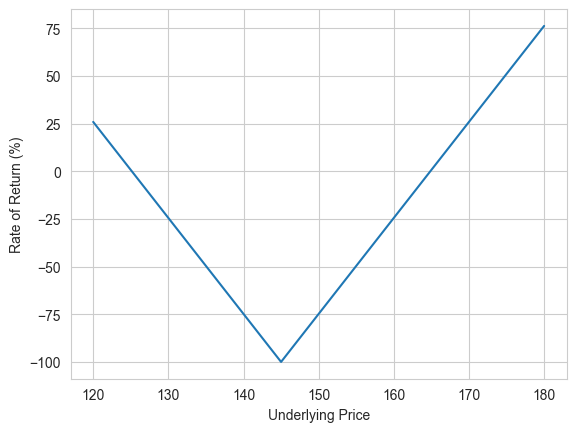

In [12]:
put_value = np.maximum(145 - stock_value, 0)
call_value = np.maximum(stock_value - 145, 0)
ret = 100 * (put_value + call_value - 19.85) / 19.85

plt.plot(stock_value, ret)
plt.xlabel("Underlying Price")
plt.ylabel("Rate of Return (%)")
plt.show()

*5. Repeat #2 for a butterfly spread.  What are you betting on with a butterfly spread?*

An example would be to buy a 140 call, sell two 150 calls, and buy a 160 call.  The cost of the spread is 14.93 - 8.89 - 8.89 + 4.70 = 1.85.  You are betting on the stock ending close to 150.

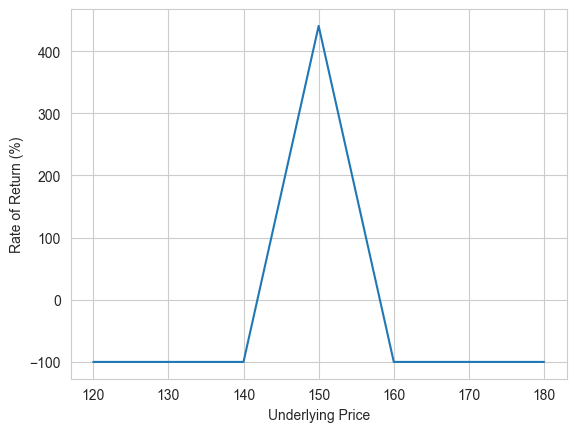

In [14]:
call1_value = np.maximum(stock_value - 140, 0)
call2_value = np.maximum(stock_value - 150, 0)
call3_value = np.maximum(stock_value - 160, 0)
ret = 100 * (call1_value - 2*call2_value + call3_value - 1.85) / 1.85

plt.plot(stock_value, ret)
plt.xlabel("Underlying Price")
plt.ylabel("Rate of Return (%)")*
plt.show()

*6. Consider the 140 call and put.  What is the "PV of strike" that is consistent with put-call parity?*

Put call parity is "underlying price + put premium = PV of strike + call premium."  Equivalently, "PV of strike = underlying price + put premium - call premium."

In [15]:
underlying = 147
put = 6.25
call = 14.93
print(f"PV of strike should be ${underlying + put - call: .2f}")

PV of strike should be $ 138.32
